<a href="https://colab.research.google.com/github/KushangShah/AlmaBetter-Projects/blob/main/Module%206%20Machine%20Learning/6.1%20Capstone%20Project%20ML/CapstoneProject_Airline_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - IndiGo Airline Passenger Referral Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name-** Kushang Shah

# **Project Summary -**

In the fast-paced and highly competitive airline sector, companies such as IndiGo are constantly working to improve the customer journey and foster long-term loyalty. A key aspect of this initiative involves analyzing and predicting passenger referrals, which greatly impact the airline’s brand reputation and market standing. By examining passenger reviews spanning from 2006 to 2019, IndiGo gains valuable insights into customer perceptions across various aspects of air travel. These reviews serve as a rich source of feedback on elements such as comfort, service quality, and overall value, and play a crucial role in influencing the decisions of prospective travelers.


# **GitHub Link -**

Github [Link]("https://github.com/KushangShah/AlmaBetter-Projects/tree/main/Module%206%20Machine%20Learning/6.1%20Capstone%20Project%20ML")

Google Drive [Link]("https://drive.google.com/drive/folders/15H6t6dP5dWjnHG2T8vM6c3oYjYk3S-X0?usp=sharing")

# **Problem Statement**


By using this big dataset, IndiGo wants to make a model that can guess which passengers will say good things about the airline to others. With this knowledge, IndiGo can:

1.   **Make Customer Experience Better**
    - IndiGo can find out what things make passengers happy and focus on improiving those. This way, passengers will feel more satisfied with the service.

2.   **Fix Important problems**
    - If IndiGo knows why some people don't want to recommend the airline, they can try to fix those issues -- Like making flights more comfortable, giving better service, or offering good prices.

3.   **Better Marketing Plans**
    - When IndiGo understands why people talk good about them, they can make smart advertisements and use good customer stories to make more people like the brand.

4.   **Stay ahead of Others**
    - By always improving their service based on what people say. IndiGo can become better than otther airlines and stay strong in the market.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# For hypothesis
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

Mounted at /content/drive


### Dataset Loading

In [2]:
# Load Dataset
Airline_df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Cohort Paris/ML/Capstone Project/data_airline_reviews.xlsx")

In [3]:
df = Airline_df.copy()

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(131895, 17)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(70711)

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
airline,65948
overall,67878
author,65948
review_date,65948
customer_review,65948
aircraft,112177
traveller_type,92140
cabin,68592
route,92169
date_flown,92262


<Axes: >

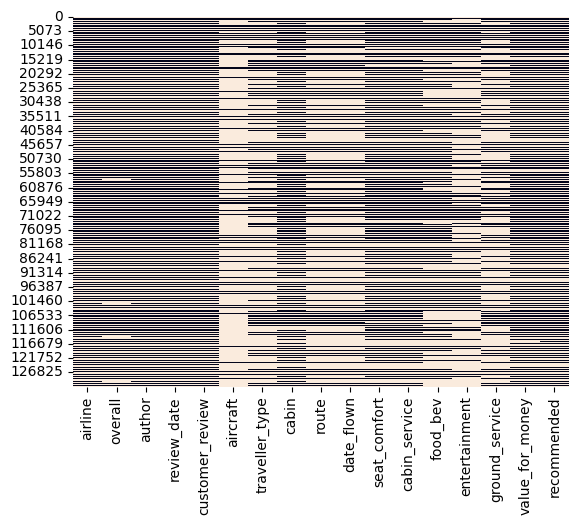

In [10]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

### Dataset Description

| Column Name       | Description                                             |
|-------------------|---------------------------------------------------------|
| airline           | Name of the airline.                                    |
| overall           | Overall points given to the trip (1 to 10).             |
| auther            | Author of the trip.                                     |
| reviewdata        | Date of the customer's review.                          |
| aircraft          | Type of the aircraft.                                   |
| travellertype     | Type of traveller.                                      |
| Flight date       | Cabin at the flight date flown.                         |
| cabin service     | Rated between 1 to 5.                                    |
| foodbev           | Rated between 1 to 5.                                    |
| entertainment     | Rated between 1 to 5.                                    |
| groundservice     | Rated between 1 to 5.                                    |
| valueformoney     | Rated between 1 to 5.                                    |
| recommended       | Binary, target variable.                                |


I have 131,895 rows but,
 - many coloumns havev 50% or more missing values.
 - The key coloumn `recommended`(target) is missing in ~67,000 rows, which is ~51% of the data set.
 - The only clean data seems to be around 55K - 65Krows, which is still large enough for traning a model.


## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [12]:
# Dataset Describe
round(df.describe(), 2)

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.00,60681.00,60715.00,52608.00,44193.00,39358.00,63975.00
mean,5.15,2.95,3.19,2.91,2.86,2.69,2.94
std,3.48,1.44,1.57,1.48,1.51,1.61,1.59
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,1.00,1.00,2.00,1.00,1.00,1.00,1.00
50%,5.00,3.00,3.00,3.00,3.00,3.00,3.00
75%,9.00,4.00,5.00,4.00,4.00,4.00,4.00
max,10.00,5.00,5.00,5.00,5.00,5.00,5.00


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for col in df.columns:
  print(f"{col}: {df[col].unique()}\n")

airline: [nan 'Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 'Air Canada rouge' 'airBaltic' 'Air China'
 'Cathay Pacific Air

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# all the even number row are NaN, so let's just drop them.
df = df[~(df.index % 2 == 0)].reset_index(drop=True)

In [15]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [16]:
df.shape

(65947, 17)

In [17]:
df.isna().sum()

,0
airline,13512
overall,14802
author,13512
review_date,13512
customer_review,13512
aircraft,48806
traveller_type,34654
cabin,15038
route,34677
date_flown,34755


In [18]:
# These are critical and should not be imputed
df = df.dropna(subset=['airline', 'author', 'review_date', 'customer_review'])


In [19]:
# Filling null value with overall median
df['overall'] = df['overall'].fillna(df['overall'].median())

In [20]:
# filling unknown in place null in aircarft
df['aircraft'] = df['aircraft'].fillna('Unknown')

In [21]:
# filling null value in traveller_type
df['traveller_type'] = df['traveller_type'].fillna('Unknown')

# filling unknown in cabin
df['cabin'] = df['cabin'].fillna('Unknown')

# filling unknown in route
df['route'] = df['route'].fillna('Unknown')

#filling unknown in date_flown
df['date_flown'] = df['date_flown'].fillna('Unknown')

In [22]:
# every null value in rating column are filled with median
rating_cols = ['seat_comfort', 'cabin_service', 'food_bev',
               'entertainment', 'ground_service', 'value_for_money']

for col in rating_cols:
    df[col] = df[col].fillna(df[col].median())


In [23]:
#
df['recommended'] = df['recommended'].fillna(df['recommended'].mode()[0])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52435 entries, 0 to 52434
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          52435 non-null  object 
 1   overall          52435 non-null  float64
 2   author           52435 non-null  object 
 3   review_date      52435 non-null  object 
 4   customer_review  52435 non-null  object 
 5   aircraft         52435 non-null  object 
 6   traveller_type   52435 non-null  object 
 7   cabin            52435 non-null  object 
 8   route            52435 non-null  object 
 9   date_flown       52435 non-null  object 
 10  seat_comfort     52435 non-null  float64
 11  cabin_service    52435 non-null  float64
 12  food_bev         52435 non-null  float64
 13  entertainment    52435 non-null  float64
 14  ground_service   52435 non-null  float64
 15  value_for_money  52435 non-null  float64
 16  recommended      52435 non-null  object 
dtypes: float64(7), ob

In [25]:
df.isna().sum()

,0
airline,0
overall,0
author,0
review_date,0
customer_review,0
aircraft,0
traveller_type,0
cabin,0
route,0
date_flown,0


In [26]:
df.shape

(52435, 17)

### What all manipulations have you done and insights you found?

1. Removed empty rows.
  - I saw that all even number rows(e.g., 0, 2, 4, 6, 8...) are empty. They have only NaN values.
  - So i removed all those rows.
  - After this, I have `65,947 rows` left in the data.

2. Fix missing values.
  - Then I checked for missing values. many columns have NaN(missing) values.
  - This is what i do.
    - Column Name - Missing Value - What i did
    - airline           - 13512 - Remove these rows     
    - overall           - 14802 - Remove                
    - author            - 13512 - Remove                
    - review\_date      - 13512 - Remove                
    - customer\_review  - 13512 - Remove                
    - aircraft          - 48806 - Fill with `'Unknown'`
    - traveller\_type   - 34654 - Fill with `'Unknown'`
    - cabin             - 15038 - Remove                
    - route             - 34677 - Fill with `'Unknown'`
    - date\_flown       - 34755 - Fill with `'Unknown'`
    - seat\_comfort     - 17065 - Remove                
    - cabin\_service    - 17041 - Remove                
    - food\_bev         - 21609 - Remove                
    - entertainment     - 28255 - Remove                
    - ground\_service   - 34941 - Remove                
    - value\_for\_money - 15009 - Remove                
    - recommended       - 14752 - Remove
  - Now, No more missing value in the data.


In [27]:
clean_df = df.copy()
clean_df.to_csv("Clean_Airline_Passenger_Referral_Prediction.csv", index=False)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Count of Reviews per Airline

In [28]:
plt.style.use('ggplot')
sns.set_theme()

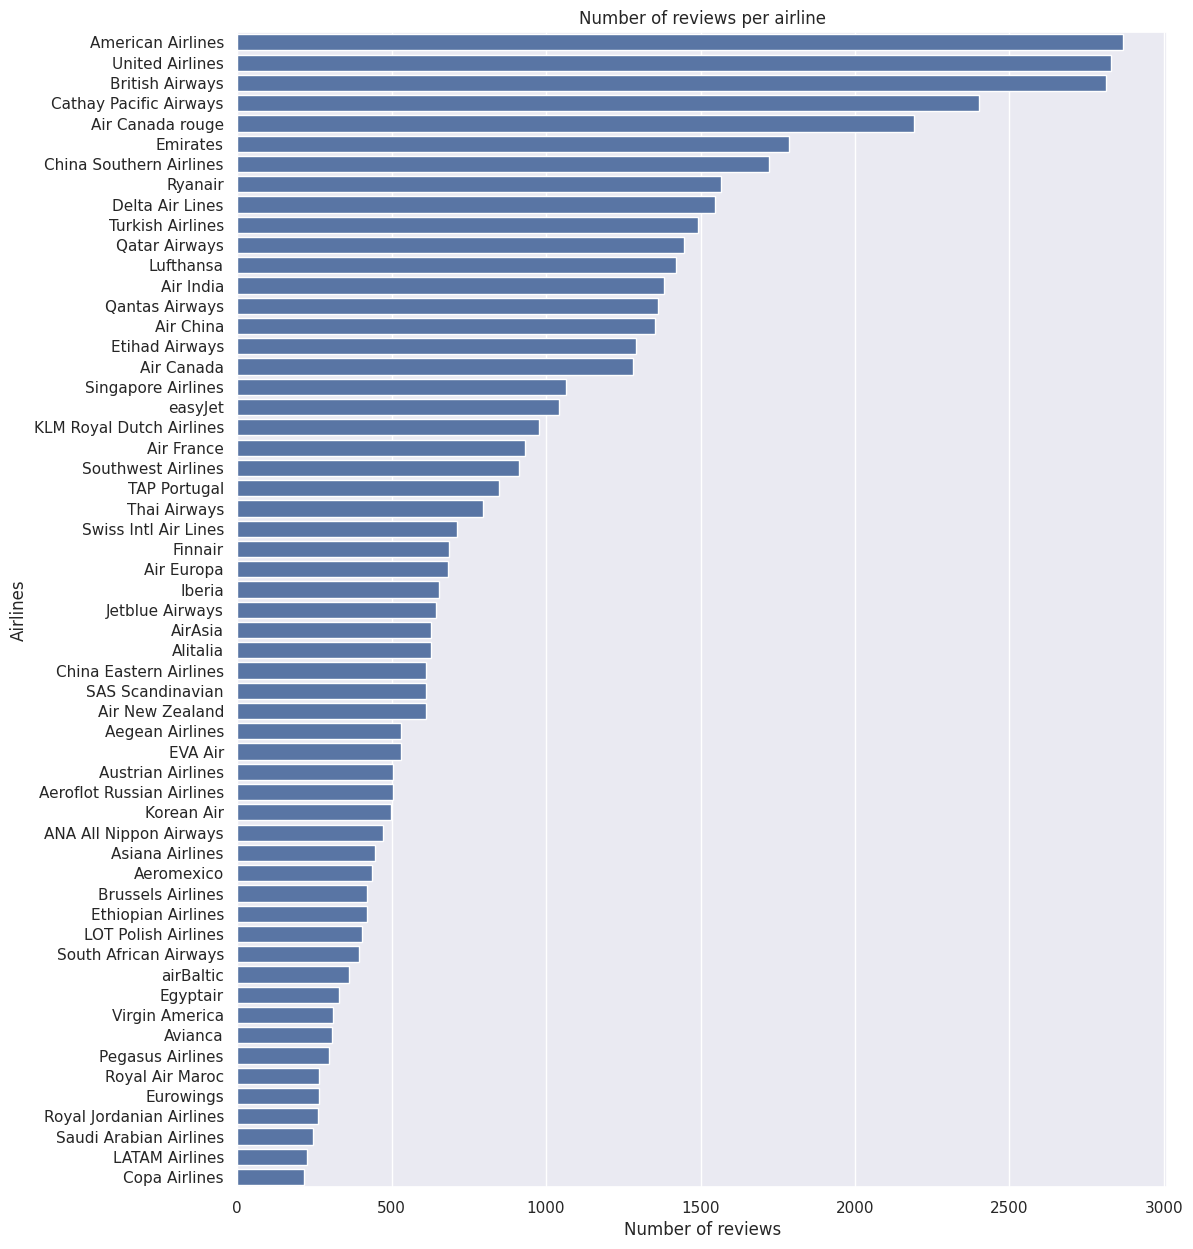

In [29]:
# Chart - 1 Count of Reviews per Airline
plt.figure(figsize=(12, 15))
sns.countplot(data=df, y='airline', order=df['airline'].value_counts().index)
plt.title("Number of reviews per airline")
plt.xlabel("Number of reviews")
plt.ylabel("Airlines")
plt.show()

##### 1. Why did you pick the specific chart?

I choose this chart because it easy to understand which airline got more reviews. Bar chart show airline name and how many people write review for it. It help to see which airline is popular

##### 2. What is/are the insight(s) found from the chart?

We can see American Airlines and United Airlines have most reviews. That mean many people fly with them or care to leave review. Airlines like Copa Airlines and LATAM Airlines have very few reviews. Maybe they not much popular or people don’t give review.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this help business. If airline see many review, it mean people use their service and they can improve based on what people say. For small review airlines, they need work more on marketing or service to get more customer and feedback.
If airline has less review, maybe people don’t know much about them, or service is not good. So that can hurt their growth. But they can change this if they try.

#### Chart - 2: Distribution of overall rating

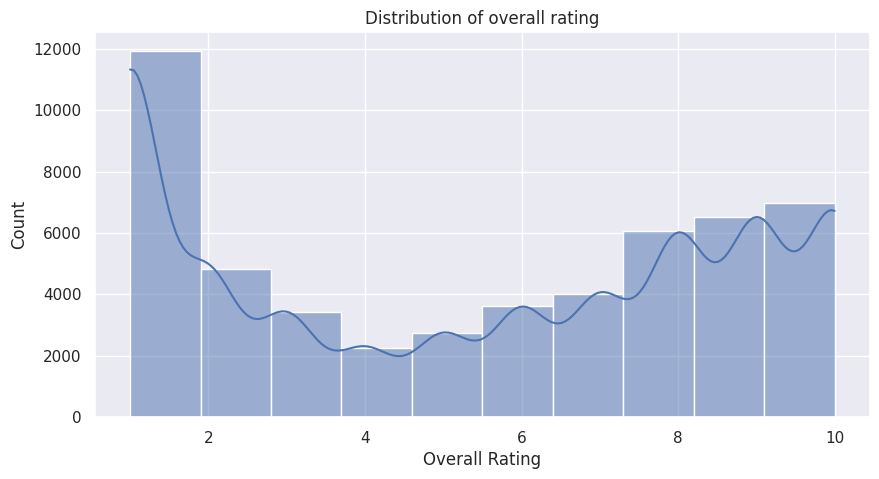

In [30]:
# Chart - 2 Distribution of overall rating

plt.figure(figsize=(10, 5))
sns.histplot(df['overall'], bins=10, kde=True)
plt.title("Distribution of overall rating")
plt.xlabel("Overall Rating")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

i choose this chart because it show how many people give each rating from 1 to 10. It help to understand what rating is more common. This chart gives idea of customer feeling - Happy or Unhappy.

##### 2. What is/are the insight(s) found from the chart?

Many people give very low rating (like 1), and also many give high rating (8, 9, 10). But not many people give middle ratings like 5 or 6. This show that customer either really happy or really upset. Not many people feel "average".

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this help business. If many people give 1 star, it mean something bad happen — maybe bad service, late flight, or bad food. Airline can read reviews and fix problems.<br>
Also, good part is many give high rating. That mean some airline doing good job, so they can continue that.<br>
But if business ignore the bad ratings, then growth can go down. It important to listen to unhappy customers too.

#### Chart - 3: Average rating by Traveller Type

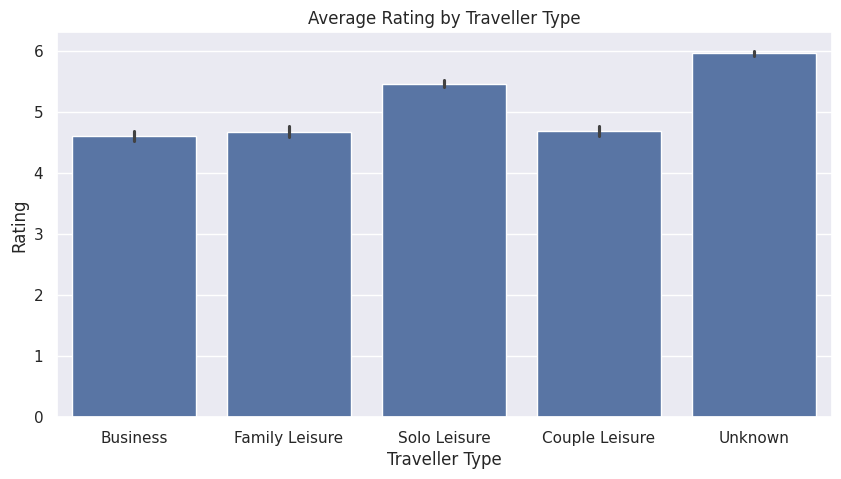

In [31]:
# Chart - 3 Average rating by Traveller Type

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='traveller_type', y='overall')
plt.title('Average Rating by Traveller Type')
plt.xlabel("Traveller Type")
plt.ylabel("Rating")
plt.show()

##### 1. Why did you pick the specific chart?

I pick this chart because it show how different types of traveller give rating. It help to understand which group happy and which group not happy. It help company know customer better.

##### 2. What is/are the insight(s) found from the chart?

Solo leisure travellers give higher rating. That mean people who travel alone for fun are more happy. Business and family travellers give little lower rating. Maybe they not enjoy service so much or they face some problem. “Unknown” type has highest rating, but maybe it's missing data, so not trust fully.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If business see that solo travellers happy, they can check what service they like — maybe fast check-in, smooth flight. Then airline can use same for others.<br>
If business travellers not so happy, maybe need improve internet, comfort, or timing. Fixing this can make better rating and more return customer.<br>
If ignore this, then those groups may not fly again, and airline lose profit.

#### Chart - 4 Cabin Class VS Value for money

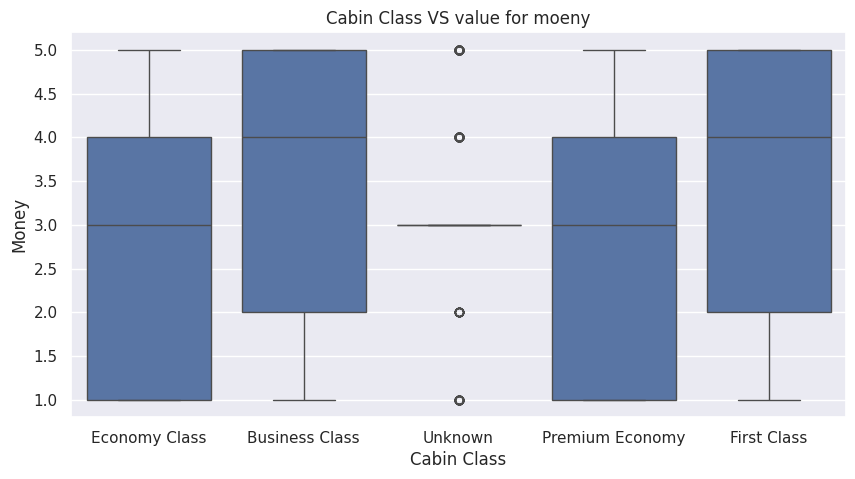

In [32]:
# Chart - 4 Cabin Class VS value for money

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='cabin', y='value_for_money')
plt.title("Cabin Class VS value for moeny")
plt.xlabel("Cabin Class")
plt.ylabel("Money")
plt.show()

##### 1. Why did you pick the specific chart?

I pick this chart because it shows how people from different cabin classes rate the value for money. It helps compare which class people feel is worth the price and which is not.

##### 2. What is/are the insight(s) found from the chart?

*   Business Class and First Class passengers give higher ratings for value for money. Most ratings are 4 or 5.
*   Economy and Premium Economy ratings are mixed — some people feel it's worth it, some not.
*   The “Unknown” class mostly stays around the middle rating (3), so not much info.

This tells that higher-paying customers are more satisfied with what they get.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If First and Business Class feel they get value, airline should keep giving top service to keep them happy — they are high-paying customers.
For Economy and Premium Economy, there is room to improve. If airline adds small benefits (like better food or seat comfort), it can increase ratings and bring more customers.<br>
If ignored, Economy class passengers may feel unhappy and stop flying with the airline — this can cause negative growth.

#### Chart - 5: Count of recommendations (yes/no)

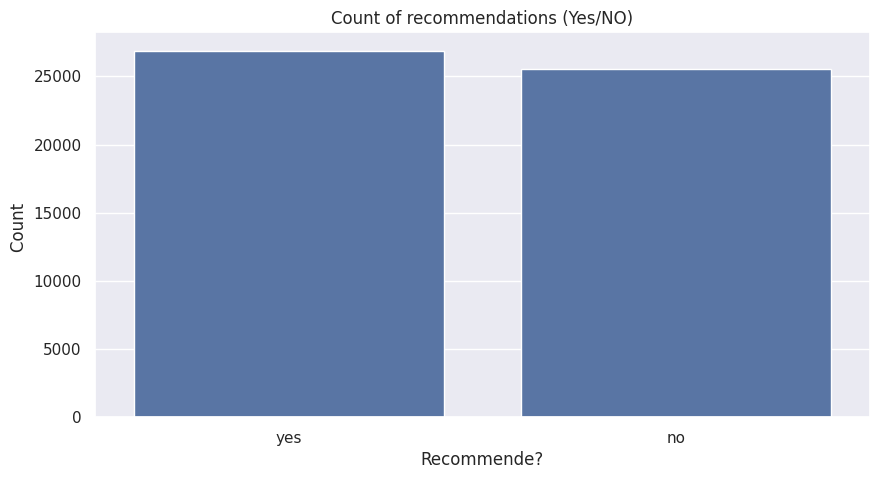

In [33]:
# Chart - 5 Count of recommendations (Yes/No)

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='recommended')
plt.title("Count of recommendations (Yes/NO)")
plt.xlabel("Recommende?")
plt.ylabel("Count ")
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to understand how many customer would recommend the airline versus those who wouldn't. It's simple but powerful way to measure overall customer statisfaction and loyalty.


##### 2. What is/are the insight(s) found from the chart?



*   The number of customer who would recommend the airline("Yes") is slightly higher than those who wouldn't("No").
*   The show is balanced option, but it's not overwhelmingly positive. A large number of customer may not reccommend.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   **Positive Impact**: Some Airline already has some good base of customer satisfied customers. With small improvement like better service or value, more people might shift to yes and may increase regular customers.

*   **Negative Impact**: Having a large number of customer saying No is a warning sign if their problems are not addressed. It could lead to bad reviews, decreas in repeated customer and harm their airline reputation.



#### Chart - 6: Entertainment rating by cabin class

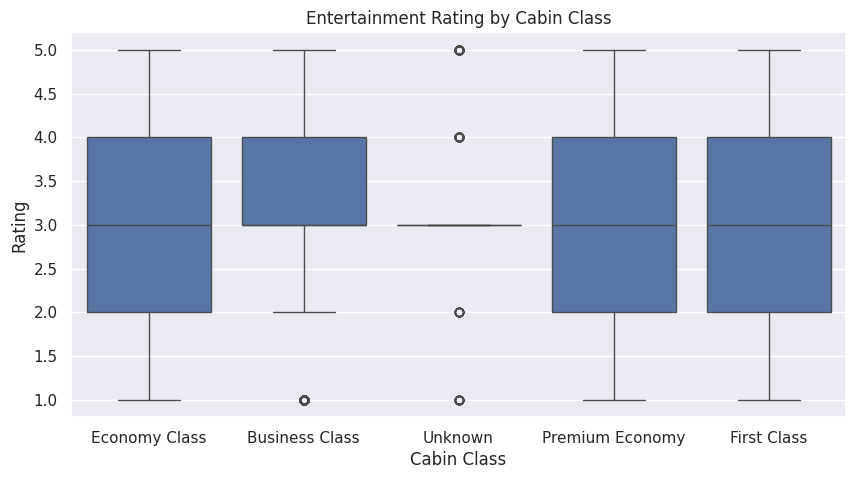

In [34]:
# Chart - 6 Entertainment Rating by cabin class

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='cabin', y='entertainment')
plt.title("Entertainment Rating by Cabin Class")
plt.xlabel("Cabin Class")
plt.ylabel("Rating")
plt.show()

##### 1. Why did you pick the specific chart?

I choose this graph to analyze how customers in different airline's cabin rate the in flight entertainment. Since it effect in long flight, So understanding their comparision is essential for understanding service quality across pricing tiers.

##### 2. What is/are the insight(s) found from the chart?

From this graph it is clear that all the cabin class shows the median rating around 3 and the spread(IQR) is wide in all category, showing varying options.

suprisingly, First and business class also show low to high rating, It could suggest inconsistency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it can effect business. Company can improve their First and business class entertainment to improve consistency and can fecilate any kind of entertainment to primium class and economy class to elevate their business growth.

If company ignores their customer's bad review than it could lead to downfall of company's reputation and economy.

#### Chart - 7: Seat comfort by traveller Type

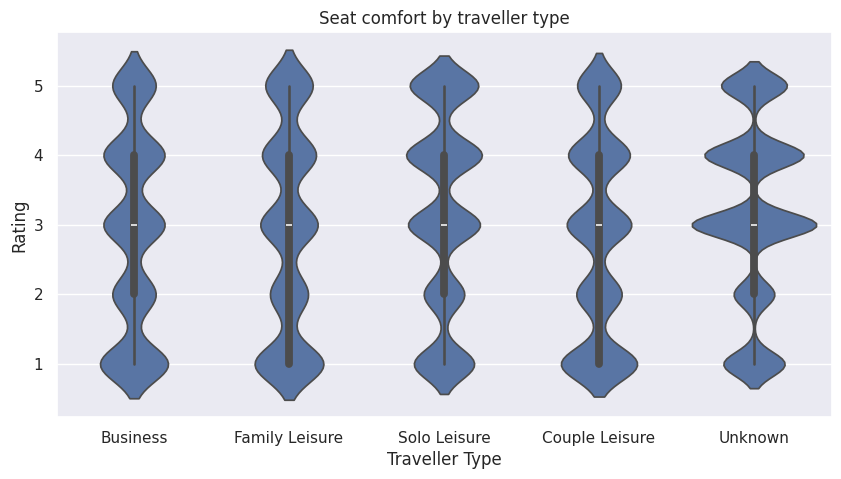

In [35]:
# Chart - 7 Seat comfort by traveller type

plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='traveller_type', y='seat_comfort')
plt.title("Seat comfort by traveller type")
plt.xlabel("Traveller Type")
plt.ylabel("Rating")
plt.show()

##### 1. Why did you pick the specific chart?

I choose violin plot because it effectively visualize both the distribution and density of seat confromt rating across different traveller types.

It helps understand how satisfied customer are with seating varies between business and leisure passengers.

##### 2. What is/are the insight(s) found from the chart?

This graph is showing a wide range of rating from 1 to 5 in all category(first, business, primium and economy).

They mostly shows similar rating across different groups, mostly around 3.

Not a single group, consistenly reports high comfrot, maybe seating satisfaction isn't significantly different based on traveler type.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can help, understand passenger need can improve seat comfrot as well. If passenger feeling uncomfortable in their, crew can help change it or if that is not possible crews can make sure that passenger don't feel more dis-comfrot.

---



#### Chart - 8: Ground Service rating by airline

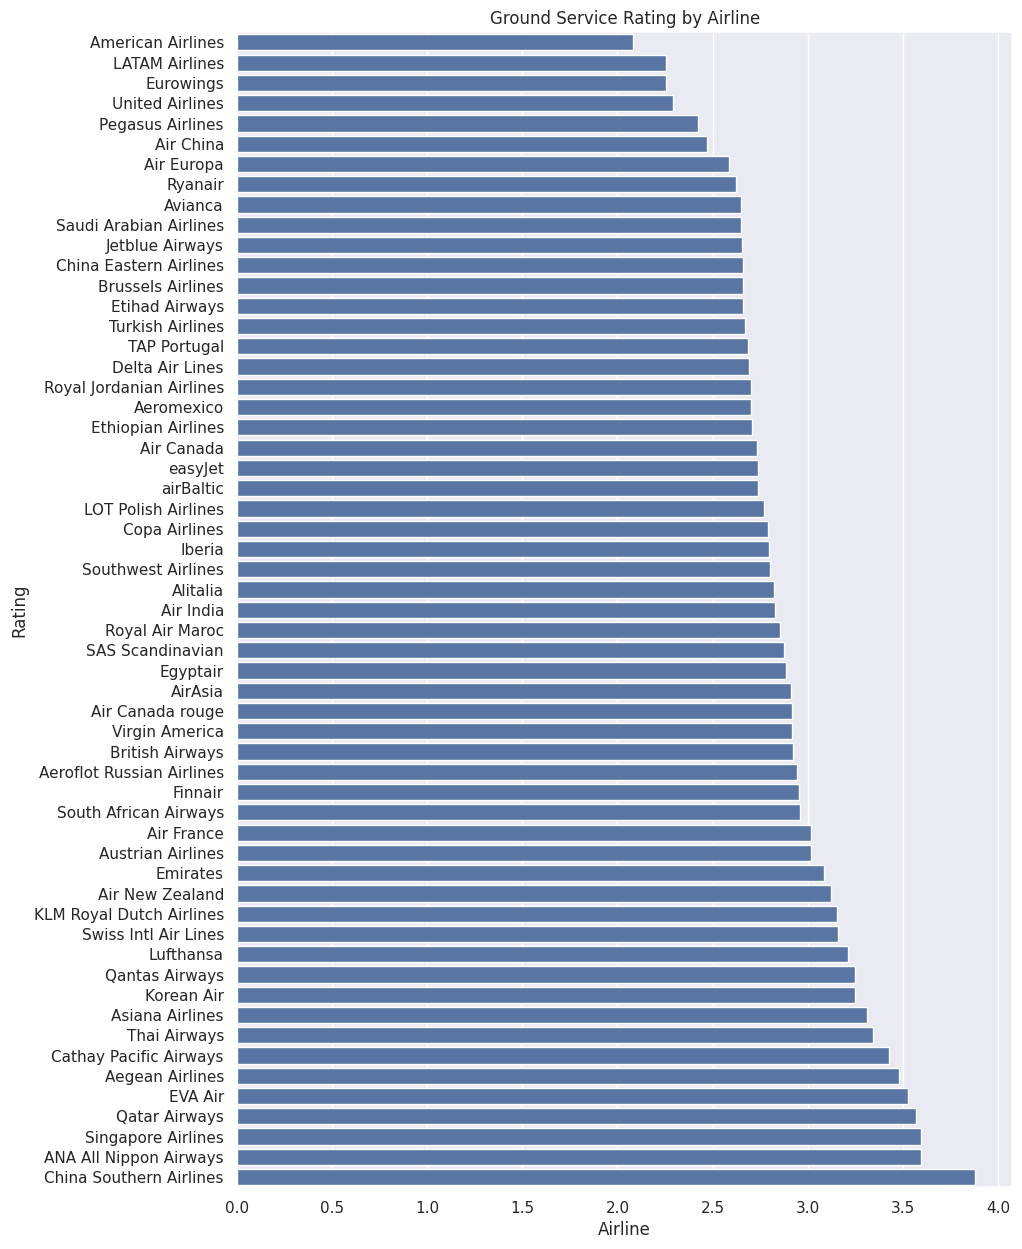

In [36]:
# Chart - 8 Ground Service Rating by Airline

linewise = df.groupby('airline')['ground_service'].mean().sort_values().index

plt.figure(figsize=(10, 15))
sns.barplot(data=df, y='airline', x='ground_service', errorbar=None, order=linewise)
plt.title("Ground Service Rating by Airline")
plt.xlabel("Airline")
plt.ylabel("Rating")
# plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

This horizontal bar chart was chosen because it clearly ranks airlines based on ground service ratings. <br>It provides an immediate comparison across many
airlines, making it easier to spot top and bottom performers at a glance.

##### 2. What is/are the insight(s) found from the chart?

* **Top performers**: `China Southern Airlines`, `ANA` (All Nippon Airways), `Singapore Airlines`, and `Qatar Airways` have the highest ground service ratings—indicating strong customer satisfaction.
* **Low performers**: `American Airlines`, `LATAM Airlines`, and `Eurowings` are at the bottom with the lowest ground service ratings—suggesting significant dissatisfaction with services like check-in, baggage handling, and boarding processes.
* Most airlines fall in the mid-to-high range, showing room for improvement among several other airlines.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Airlines with mid-range or low scores can benchmark against top-rated carriers to identify best practices in ground service.
High-performing airlines can leverage their service quality in marketing campaigns to attract more customers and maintain a premium image.

Negative Growth Indicators:
Airlines at the bottom may face customer churn, bad reviews, and reduced loyalty if these issues are not addressed.


---


#### Chart - 9: Overall rating VS value for money

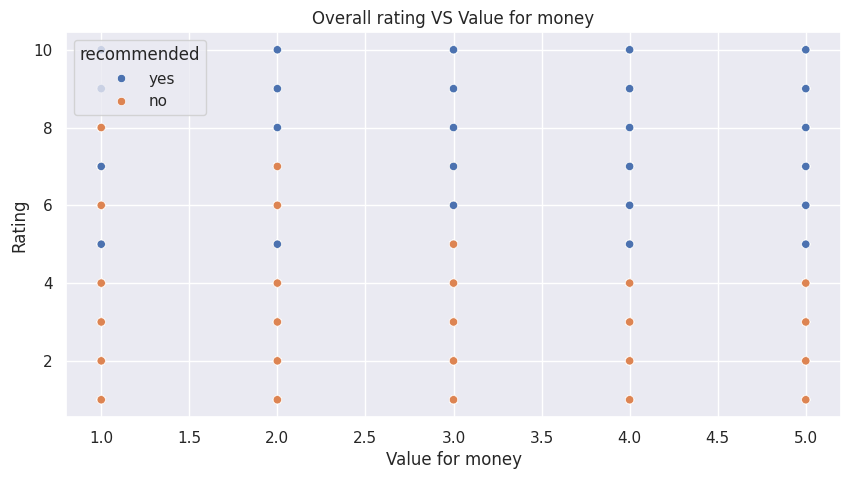

In [37]:
# Chart - 9 Overall rating VS Value for money

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='value_for_money', y='overall', hue='recommended')
plt.title("Overall rating VS Value for money")
plt.xlabel("Value for money")
plt.ylabel("Rating")
plt.show()

##### 1. Why did you pick the specific chart?

for money and overall satisfaction. By using color to represent whether the customer recommends the airline, it also provides a layer of customer sentiment, making the chart useful for identifyiing customer behaviour.

##### 2. What is/are the insight(s) found from the chart?

Good value, good rating: When people say value for money is 4 or 5, they also give high rating for flight, like 8 to 10. And many say "yes, I recommend this flight" (blue dots).

Bad value, no recommend: If value is low, like 1 or 2, people give low score and say "no, I don’t recommend" (orange dots).

Some surprise: Few people still say flight is good and recommend it, even if value is low. Maybe they like service or flight was on time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

I see from the chart, when people feel they get good value for the money, they are more happy with flight and also tell others to use it. So if airline wants more good reviews, maybe they give better price, add some free things, or make some discount—this can help people feel it’s worth the money. But if many people say value is bad, then they not happy, maybe tell friends bad things, and don’t come back. Even if food or seats are okay, if price feels too high, people still not like it. So airline must make sure price and service match. If you give good service for good price, people come again and say good things.

---

#### Chart - 10: Food and Beverage rating by airline

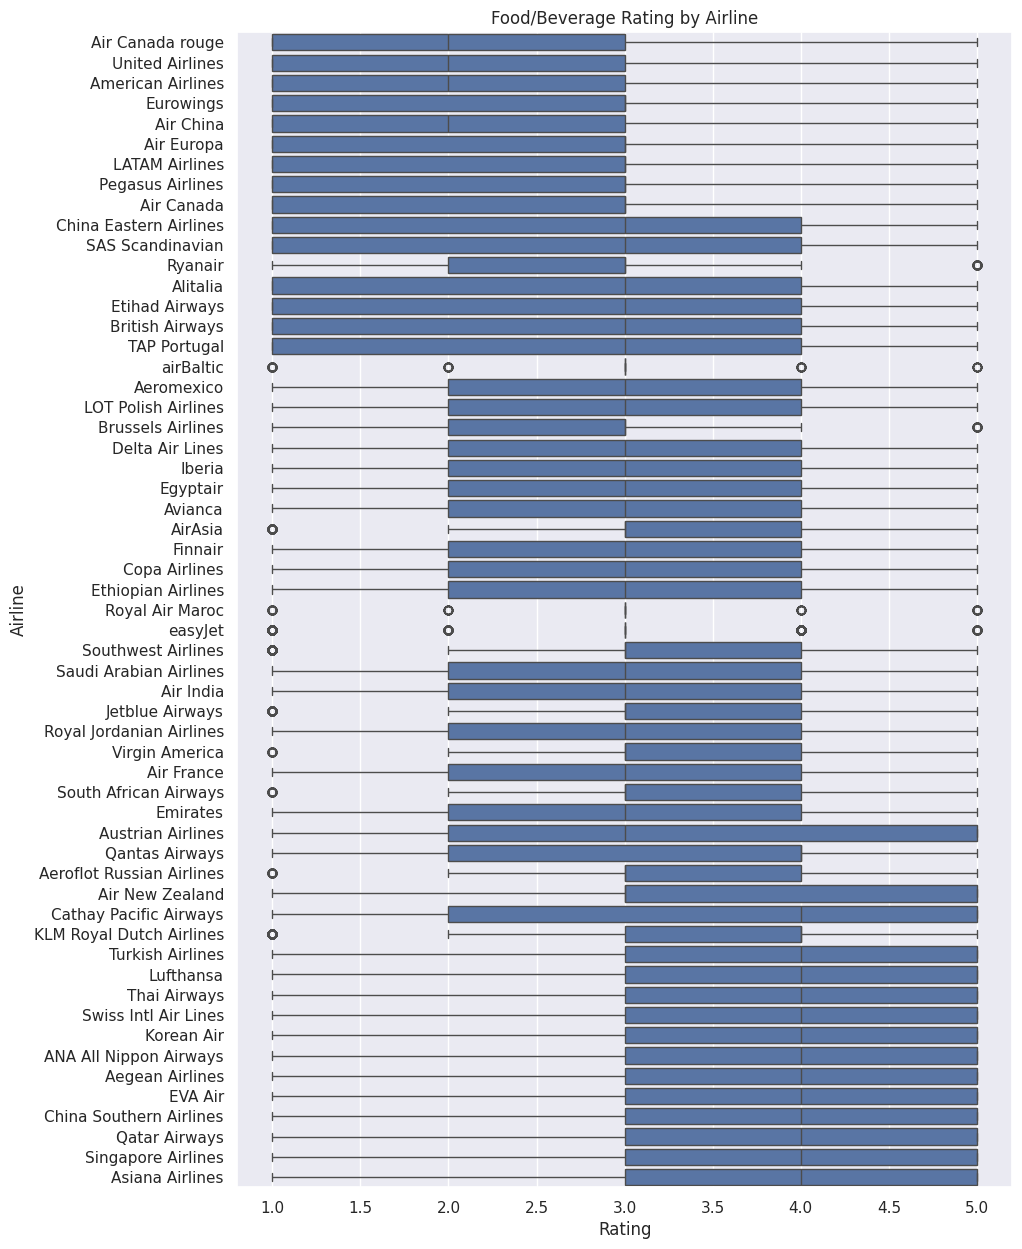

In [38]:
# Chart - 10 Food and Beverage Rating by Airline

linewise = df.groupby('airline')['food_bev'].mean().sort_values().index

plt.figure(figsize=(10, 15))
sns.boxplot(data=df, x='food_bev', y='airline', order=linewise)
plt.title("Food/Beverage Rating by Airline")
plt.xlabel("Rating")
plt.ylabel("Airline")
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart because it clearly shows how different airlines are rated for their food and drinks. It's easy to compare all airlines side by side and see who’s doing better or worse.

##### 2. What is/are the insight(s) found from the chart?

 - Airlines like Singapore Airlines, Qatar Airways, ANA, Emirates, and Turkish Airlines have high food ratings.
 - On the other hand, Ryanair, AirAsia, and some budget airlines have much lower food scores.
 - Most of the top-rated airlines are known for international or long-haul flights, while lower-rated ones are mostly budget or regional airlines.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this can help businesses in a good way. If an airline sees its food rating is low, they can try to improve it by offering better meals or snacks. That might make passengers happier and come back again.

But for the airlines with low ratings, if they don’t try to fix this, they could lose customers. People might choose a different airline just because the food is bad, especially on long flights. So it could hurt their business if they ignore it.

#### Chart - 11: Number of Reviews over time

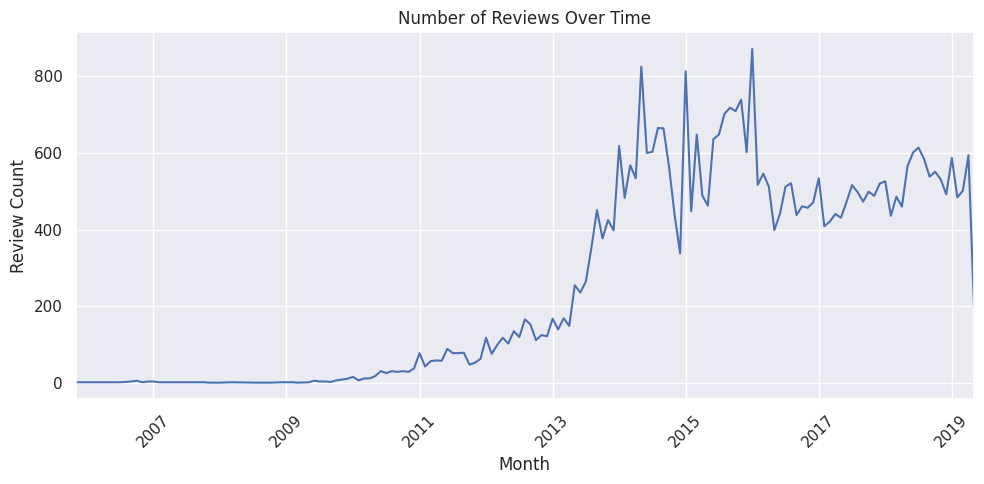

In [39]:
# Chat - 11 Number of Reviews over time

df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
monthly_reviews = df['review_date'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(10, 5))
monthly_reviews.plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart because it shows how the number of reviews changed over the years. It's good to see if more people started giving reviews or not.

##### 2. What is/are the insight(s) found from the chart?

 - Before 2011, there were very few reviews.
 - After that, reviews started going up fast, especially from 2013 to 2015.
 - The highest number of reviews came between 2014 and 2016.
 - After that, it stayed kind of stable, with a few ups and downs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it can help in a good way. It shows that more people are writing reviews now than before. That means people are more engaged, and businesses can use those reviews to improve.

But if we see the reviews dropping in some years, it could mean people are losing interest or not happy. So if the number goes down, it's like a warning for the company to look into why people are not talking about them anymore.

#### Chart - 12: Entertainment Rating VS overall Rating

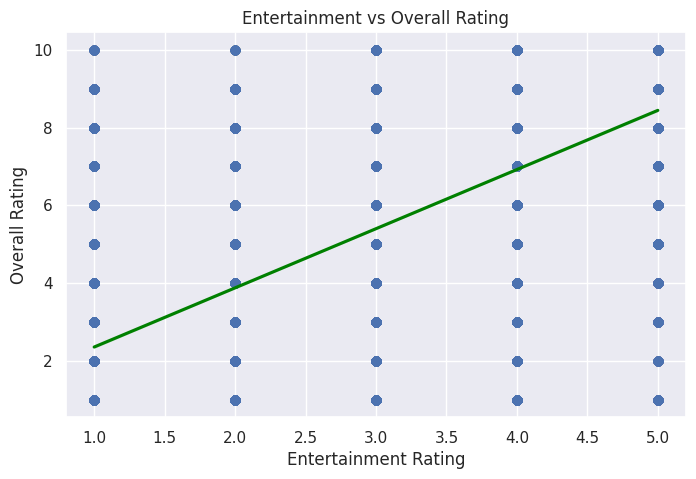

In [40]:
# Chart - 12 Entertainment rating VS ovearall rating

plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='entertainment', y='overall', line_kws={'color': 'green'})
plt.xlabel('Entertainment Rating')
plt.ylabel('Overall Rating')
plt.title('Entertainment vs Overall Rating')
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart because it shows how the entertainment rating affects the overall rating. It helps to know if people care about entertainment when they rate their whole experience.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we see when entertainment rating is high, the overall rating is also high. When entertainment is low, overall rating is also low. So, there is a clear connection — better entertainment, better rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this can help in a good way. It shows that if airlines improve entertainment, people will give higher overall ratings. This can make customers happy and choose the airline again.

If airlines give bad or no entertainment, it can hurt the rating. That’s not good for business. So, focusing on better entertainment gives positive growth.

#### Chart - 13: Count of traveller types per cabin class

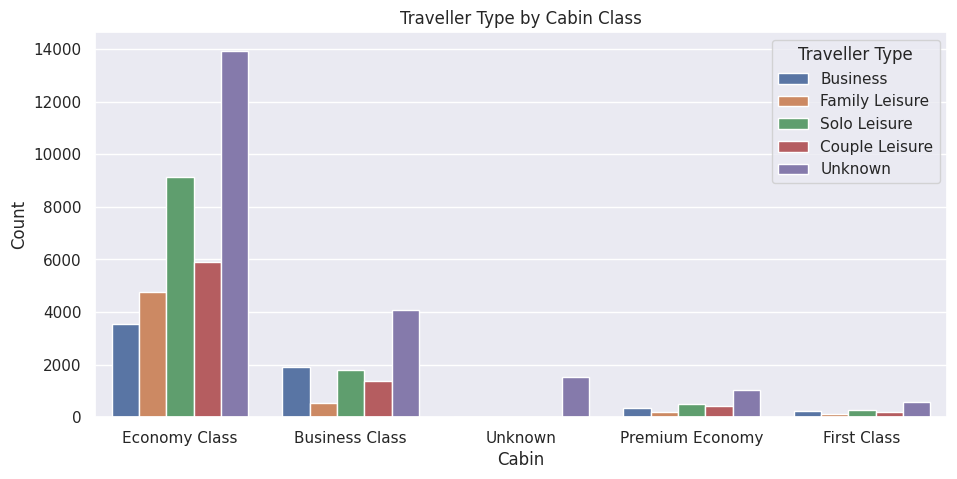

In [41]:
# Chart - 13 Count of Traveller types per Cabin Class

plt.figure(figsize=(11, 5))
sns.countplot(data=df, x='cabin', hue='traveller_type')
plt.title('Traveller Type by Cabin Class')
plt.xlabel('Cabin')
plt.ylabel('Count')
# plt.xticks(rotation=45)
plt.legend(title='Traveller Type')
plt.show()

##### 1. Why did you pick the specific chart?

I choose this chart because it shows which type of people travel in which cabin class. It is helpful to know customer types and their travel choices.

##### 2. What is/are the insight(s) found from the chart?

We can see most people travel in Economy Class, and many of them are Solo Leisure, Family Leisure, and Couple Leisure. Also, Unknown traveler type is very high in all cabin classes, especially in Economy.

Business Class is not used much, and even Premium Economy and First Class have very low counts. Most people don’t choose them.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this can help in good way. If we know most travelers are solo or family in Economy, we can give them better offers or services in that class. Maybe family discounts or entertainment for solo travelers.

But the Unknown category is very big — this is not good. If we don’t know who the customer is, we can’t make good plans. So, this can lead to negative impact. It’s better to fix data collection so we know real traveler types.

#### Chart - 14 - Correlation Heatmap

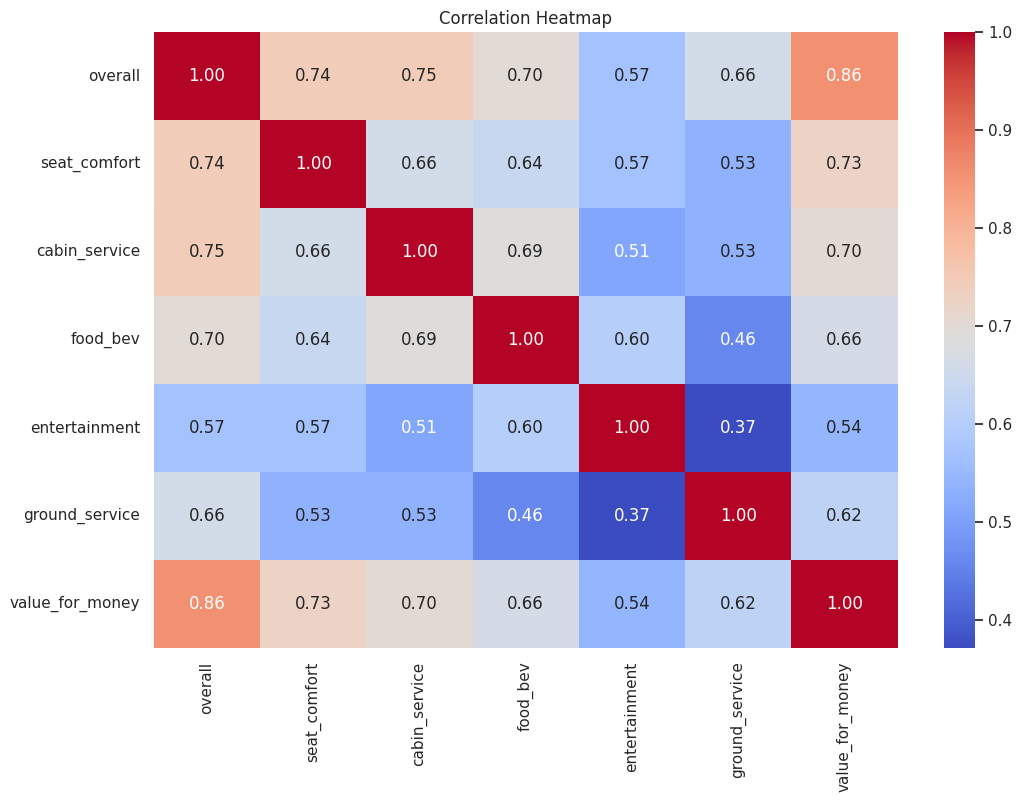

In [42]:
# Correlation Heatmap visualization code

plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart because it shows how different things like seat comfort, food, and entertainment are connected with overall rating. It helps to know which things are more important to customers.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that value for money has the strongest link with overall rating (0.86). After that, seat comfort, cabin service, and food & beverage also have strong connection with overall rating.
Entertainment and ground service are lower in connection, but still matter.

#### Chart - 15 - Pair Plot

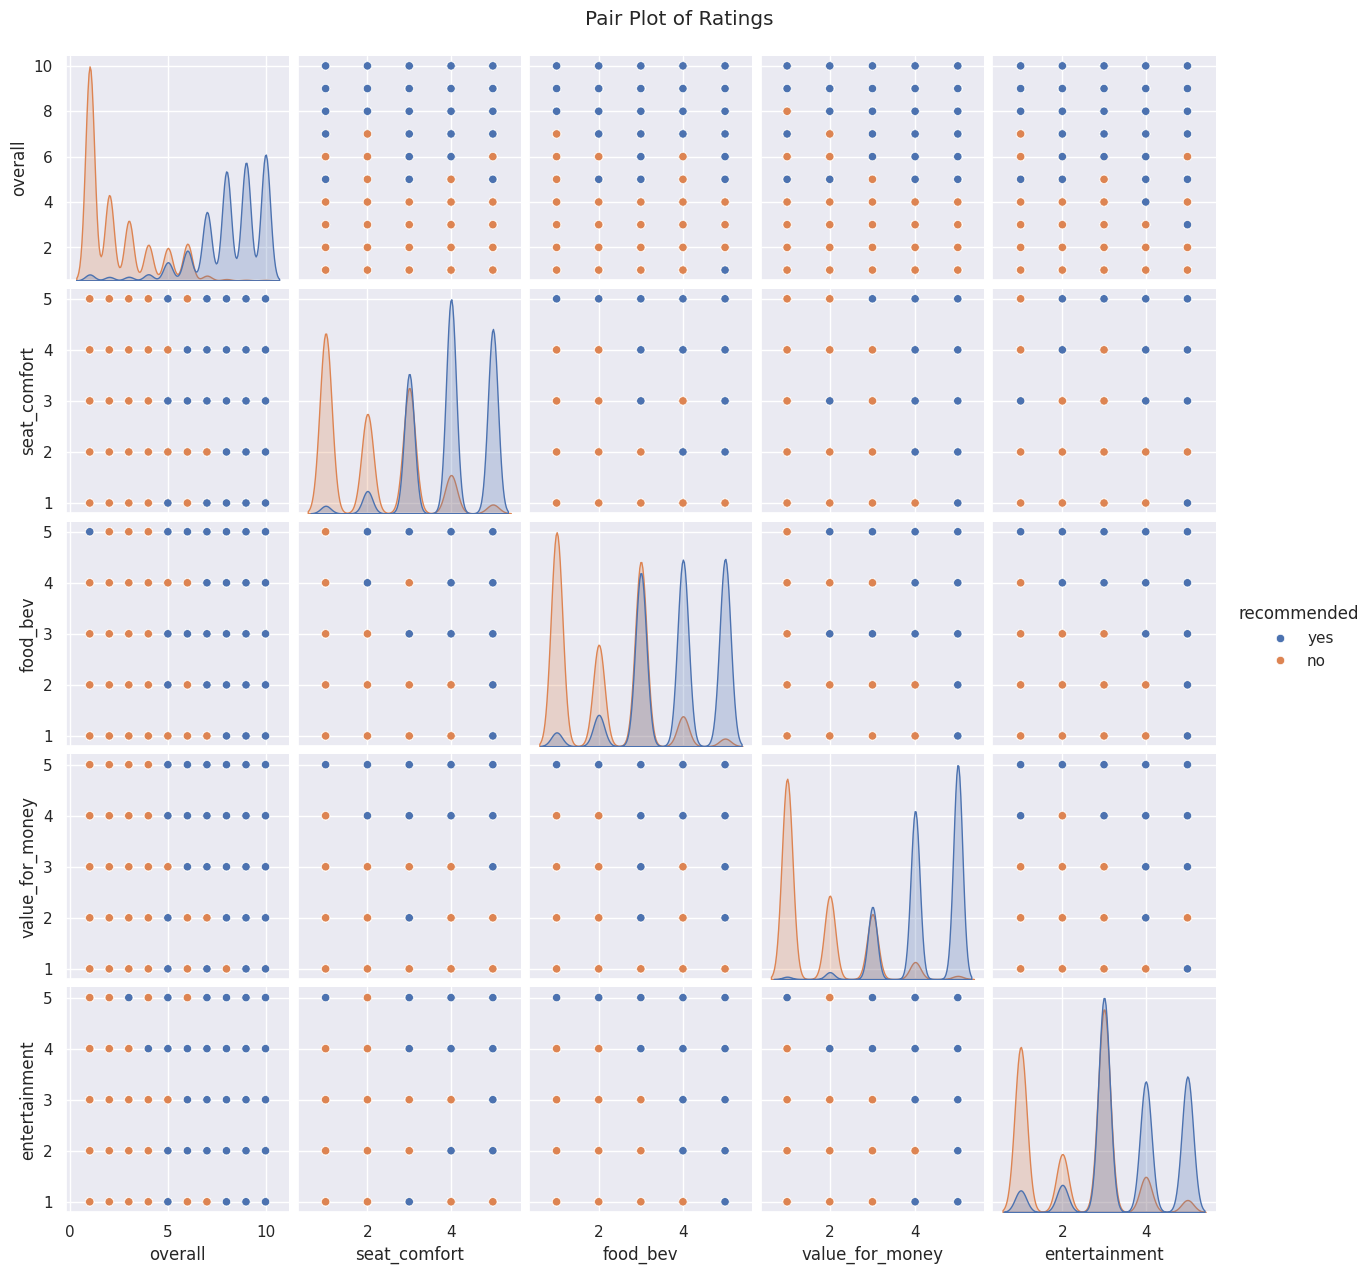

In [43]:
# Pair Plot visualization code

sns.pairplot(df[['overall', 'seat_comfort', 'food_bev', 'value_for_money', 'entertainment', 'recommended']], hue='recommended')
plt.suptitle('Pair Plot of Ratings', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart because it shows how different rating things like seat comfort, food, and value for money are connected with each other. It also shows if customer recommended the airline or not. It is easy to see how ratings change between people who said yes or no.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that people who recommended the airline (blue dots) mostly gave higher ratings for seat comfort, food, value for money, and entertainment. People who did not recommend (orange dots) gave mostly low ratings.

Also, when value for money is high, most people recommend the airline. Same thing with seat comfort and food.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Passengers who rate seat comfort high are more likely to recommend the airline.
2. There is no difference in food and beverage rating between people who recommend and don’t recommend.
3. Passengers who feel they got value for money give a higher overall rating.

### Hypothetical Statement - 1: Seat Comfort vs. Recommendation

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 - **Null Hypothesis (H₀)**: There is no correlation between value for money and overall rating.
 - **Alternate Hypothesis (H₁)**: There is a correlation between value for money and overall rating.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value

# Filter groups
seat_comfort_yes = df[df['recommended'] == 'yes']['seat_comfort'].dropna()
seat_comfort_no = df[df['recommended'] == 'no']['seat_comfort'].dropna()

# Perform independent t-test
t_stat1, p_value1 = ttest_ind(seat_comfort_yes, seat_comfort_no, equal_var=False)

print("Hypothesis 1 - Seat Comfort vs. Recommendation")
print("T-statistic:", t_stat1)
print("P-value:", p_value1)


Hypothesis 1 - Seat Comfort vs. Recommendation
T-statistic: 210.77275032755864
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

I used the independent t-test.

##### Why did you choose the specific statistical test?

Because we are comparing two groups(People who recommend VS people who don't), and both groups have numerical values(seat comfort rating), this test helps us check if the average rating are different.

### Hypothetical Statement - 2: Food and Beverages VS. Recommendation

Statement: There is no difference in food and beverage eating between people who recommend and those who don't.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. **Null Hypothesis (H₀)**: Average food and beverage rating is same for both groups (recommend and not recommend).
2. **Alternate Hypothesis (H₁)**: Average food and beverage rating is not same for both groups.

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value

# Filter groups
food_yes = df[df['recommended'] == 'yes']['food_bev'].dropna()
food_no = df[df['recommended'] == 'no']['food_bev'].dropna()

# Perform independent t-test
t_stat2, p_value2 = ttest_ind(food_yes, food_no, equal_var=False)

print("\nHypothesis 2 - Food & Beverage vs. Recommendation")
print("T-statistic:", t_stat2)
print("P-value:", p_value2)



Hypothesis 2 - Food & Beverage vs. Recommendation
T-statistic: 195.7408184281019
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

I used the independent t-test again.

##### Why did you choose the specific statistical test?

We are again comparing two groups based on a rating. So, independent t-test is good to check if there is a difference in average food raing.

### Hypothetical Statement - 3

Statement: Passengers who feel they got value for money give higher overall ratings.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. Null Hypothesis (H₀): There is no correlation between value for money and overall rating.
2. Alternate Hypothesis (H₁): There is a correlation between value for money and overall rating.

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value

# Drop rows with missing values
subset = df[['value_for_money', 'overall']].dropna()

# Perform Pearson correlation
corr_coefficient, p_value3 = pearsonr(subset['value_for_money'], subset['overall'])

print("\nHypothesis 3 - Value for Money vs. Overall Rating")
print("Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value3)



Hypothesis 3 - Value for Money vs. Overall Rating
Correlation Coefficient: 0.8568927591531309
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

I used the Pearson correlation test

##### Why did you choose the specific statistical test?

Because we are checking the relationship between two numerica values(value for money and overall rating). This test helps to see if there is a linear connection between them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [47]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [48]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [49]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [50]:
# Expand Contraction

#### 2. Lower Casing

In [51]:
# Lower Casing

#### 3. Removing Punctuations

In [52]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [53]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [54]:
# Remove Stopwords

In [55]:
# Remove White spaces

#### 6. Rephrase Text

In [56]:
# Rephrase Text

#### 7. Tokenization

In [57]:
# Tokenization

#### 8. Text Normalization

In [58]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [59]:
# POS Taging

#### 10. Text Vectorization

In [60]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [61]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [62]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [63]:
# Transform Your data

### 6. Data Scaling

In [64]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [65]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [66]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [67]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [68]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [71]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [73]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [74]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [76]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [77]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***